In [ ]:
# to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# get the data from

!wget https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip

# unzip the data
!unzip "/content/brain_tumor data set.zip"
!rm "/content/brain_tumor data set.zip"

--2023-07-11 14:45:14--  https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip [following]
--2023-07-11 14:45:14--  https://www.dropbox.com/s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd0a6b848ff6a8ad2ece778b804.dl.dropboxusercontent.com/cd/0/inline/B_psNJzlS9pZGkhEpbdizpFjaYyRU9z62-jd1eH03gdkcTa3h8uY55u1bhWcXrXsf-b_is7wBQrshGBUbmjk2bCpHStglKprW7p5EqjKDSchKWrvWR4rmW2T7whnceR_Ob9PZfh8j6yb3wEAlAO6U-YztfnSpENDKI-Q0_NyDpzGbw/file# [following]
--2023-07-11 14:45:16--  https://ucd0a6b848ff6a8ad2ece778b804.dl.dropboxusercontent.com/cd/0/inline/B_psNJzlS9pZGkhEpbdizpFjaYyRU9z6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils
import cv2

In [ ]:
# count the number of images in the respective classes

ROOT_DIR = "/content/Brain Tumor Data Set"

num_of_images = {}

for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

num_of_images

{'Brain Tumor': 2513, 'Healthey': 2087}

Split data set as following



*   70% for Train Data
*   15% for validation
*   15% for testing



In [ ]:
# we create a training folder

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(70/100*num_of_images[dir])- 5), replace = False):
      O = os.path.join(ROOT_DIR,dir, img)
      D = os.path.join("./train", dir)
      shutil.copy(O,D)
      os.remove(O)

    else:
      print("Train Folder Exist")

Train Folder Exist
Train Folder Exist


In [ ]:
# we create a validation folder

if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./val/"+dir)
    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(15/100*num_of_images[dir])- 5), replace = False):
      O = os.path.join(ROOT_DIR,dir, img)
      D = os.path.join("./val", dir)
      shutil.copy(O,D)
      os.remove(O)

    else:
      print("Validation Folder Exist")

Validation Folder Exist
Validation Folder Exist


In [ ]:
# we create a test folder

if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./test/"+dir)
    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(15/100*num_of_images[dir])- 5), replace = False):
      O = os.path.join(ROOT_DIR,dir, img)
      D = os.path.join("./test", dir)
      shutil.copy(O,D)
      os.remove(O)

    else:
      print("Test Folder Exist")

Test Folder Exist
Test Folder Exist


### Build the Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, \
                          BatchNormalization, MaxPooling2D, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing import image
import keras



In [ ]:
# Creatin the CNN model

model = Sequential()
model.add(Conv2D(filters =16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss =  keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

### Preparing data using Data Generator

In [ ]:
train_datagen = image.ImageDataGenerator(
    zoom_range = 0.2, shear_range = 0.2, rescale = 1./255, horizontal_flip = True
)

val_datagen = image.ImageDataGenerator(rescale = 1./255)

test_datagen = image.ImageDataGenerator(rescale = 1./255)



In [ ]:
train_data = train_datagen.flow_from_directory(directory = "/content/train", target_size = (224,224),\
                                               batch_size = 32, class_mode = 'binary',)


Found 3209 images belonging to 2 classes.


In [ ]:
val_data = train_datagen.flow_from_directory(directory = "/content/val", target_size = (224,224),\
                                               batch_size = 32, class_mode = 'binary',)

Found 679 images belonging to 2 classes.


In [ ]:
test_data = train_datagen.flow_from_directory(directory = "/content/test", target_size = (224,224),\
                                               batch_size = 32, class_mode = 'binary',)

Found 679 images belonging to 2 classes.


In [ ]:

# having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience= 5,\
                   verbose = 1, mode = 'auto')

# model check point
mc = ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_accuracy', \
                     verbose = 1, save_best_only = True, mode = "auto")

# putting call back in a list
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(generator = train_data, \
                           steps_per_epoch = 8,\
                           epochs = 30,verbose =1,\
                           validation_data = val_data,\
                           validation_steps = 16,\
                           callbacks=call_back)


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1.4757 - accuracy: 0.5469
Epoch 1: val_accuracy improved from -inf to 0.55078, saving model to best_model.h5
8/8 [==============================] - 86s 11s/step - loss: 1.4757 - accuracy: 0.5469 - val_loss: 0.6881 - val_accuracy: 0.5508
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6909 - accuracy: 0.5469
Epoch 2: val_accuracy did not improve from 0.55078
8/8 [==============================] - 84s 11s/step - loss: 0.6909 - accuracy: 0.5469 - val_loss: 0.6825 - val_accuracy: 0.5508
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6776 - accuracy: 0.5898
Epoch 3: val_accuracy improved from 0.55078 to 0.61523, saving model to best_model.h5
8/8 [==============================] - 90s 12s/step - loss: 0.6776 - accuracy: 0.5898 - val_loss: 0.6641 - val_accuracy: 0.6152
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6799 - accuracy: 0.6172
Epoch 4: val_accuracy did no

In [ ]:
# loading the best fit model

from keras.models import load_model

model = load_model('/content/best_model.h5')


## Model Accuracy

In [ ]:
# checking out the accuracy of our model

acc = model.evaluate_generator(generator = test_data)[1]

print(f"The accuracy of our model is = {acc*100}%")


The accuracy of our model is = 77.02503800392151%


In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

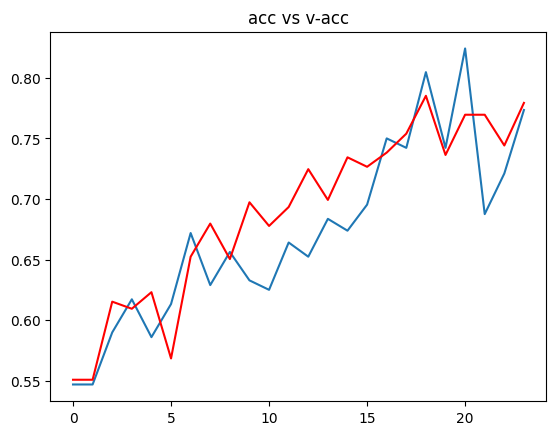

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

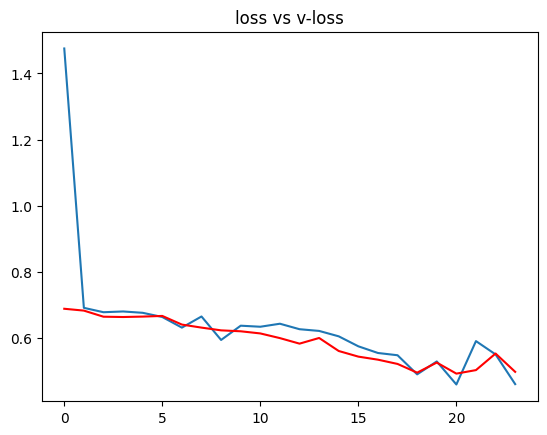

In [ ]:
plt.plot(h['loss'])
plt.plot(h["val_loss"], c = 'red')
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# path for the image to see if it predics correct class

from tensorflow.keras.preprocessing import image

path = "/content/val/Brain Tumor/Cancer (1049).jpg"
img = image.load_img(path, target_size = (224, 224),)

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = model.predict(input_arr)[0][0]

print(pred)

if pred >= 0.5:
  print("The Mri image is of BRAIN TUMOR")
else:
  print("The Mri image is of healthy brain ")

1/1 [==============================] - 0s 66ms/step
0.5804001
The Mri image is of BRAIN TUMOR


1/1 [==============================] - 0s 69ms/step


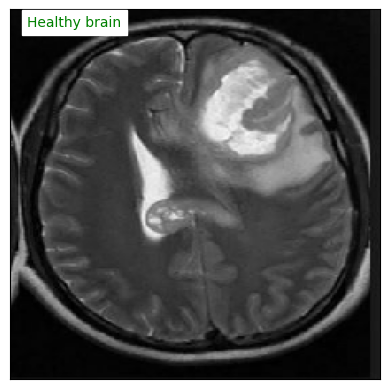

In [ ]:
import matplotlib.patches as patches

# Load the image
path = "/content/val/Brain Tumor/Cancer (1049).jpg"
img = image.load_img(path, target_size=(224, 224))

# Convert the image to an array and normalize the pixel values
input_arr = image.img_to_array(img) / 255.0

# Reshape the array to match the input shape of the model
input_arr = np.expand_dims(input_arr, axis=0)

# Make the prediction
pred = model.predict(input_arr)[0][0]

# Get the predicted class label and position
if pred >= 0.5:
    class_label = "BRAIN TUMOR"
    color = "red"
else:
    class_label = "Healthy brain"
    color = "green"

# Display the image
plt.imshow(img)

# Add a rectangle to highlight the position of the brain tumor
if class_label == "BRAIN TUMOR":
    rect = patches.Rectangle((50, 50), 100, 100, linewidth=2, edgecolor=color, facecolor="none")
    ax = plt.gca()
    ax.add_patch(rect)

# Show the class label
plt.text(10, 10, class_label, color=color, backgroundcolor="white")

# Remove the axis ticks
plt.xticks([])
plt.yticks([])

# Show the image
plt.show()
